In [1]:
from __future__ import division, print_function
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib import colors as mcolors
import matplotlib.pyplot as plt

def cc(arg):
    return mcolors.to_rgba(arg, alpha=0.6)

from shapely.geometry import Polygon, Point

def get_points_in_polygon(poly, n=1000):
    (minx, miny, maxx, maxy) = poly.bounds
    x = np.linspace(minx, maxx, n, endpoint=True)
    y = np.linspace(miny, maxy, n, endpoint=True)
    x, y = np.meshgrid(x,y)
    points = []
    for i, j in zip(x.flatten(), y.flatten()):
        p = Point(i,j)
        if poly.intersects(p):
            points.append([i,j])
    return points

def rotate(points, angle):
    alpha = angle *np.pi/180
    return np.dot(np.array([[np.cos(alpha), -np.sin(alpha)],[np.sin(alpha), np.cos(alpha)]]), points.T).T

In [2]:
%matplotlib nbagg

# průřez T

In [3]:
prurez = np.array([[0., 0],
                  [0, 100],
                  [-50, 100],
                  [-50, 150],
                  [100, 150],
                  [100, 100],
                  [50, 100],
                  [50, 0],
                  [0, 0]])
p = Polygon(prurez[:, :2])

points = get_points_in_polygon(p)
points = np.array(points)

<IPython.core.display.Javascript object>


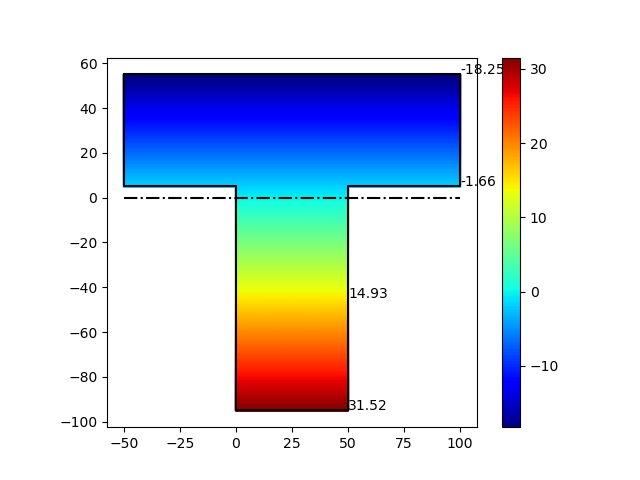

Text(50, -45, '14.93')

In [4]:
My = 7.5e-3 # [MN]
Iy = 22.604166666666666e-6
zT = 95

pnts = points
pnts[:, 1] -= zT
prurez[:, 1] -= zT
sigx = -My/Iy*pnts[:,1]*1e-3
plt.figure()
plt.plot(prurez[:, 0], prurez[:, 1], 'k-')
#plt.plot(0,0, 'ro')
#plt.plot(points[:, 0], points[:,1], 'kx')
plt.scatter(points[:, 0], points[:, 1], c=sigx, cmap=plt.cm.jet, vmin=sigx.min(), vmax=sigx.max(), s=.5)
plt.plot([-50, 100],[0, 0],'k-.')
plt.colorbar()
plt.gca().set_aspect('equal')

fsigx = lambda z: My/Iy*z*1e-3

angle = 0

z = zT
plt.text(50, -z, '{:.2f}'.format(fsigx(z)), rotation=angle)

z = -(150 - zT)
plt.text(100, -z, '{:.2f}'.format(fsigx(z)), rotation=angle)

z = -(150 - zT - 50)
plt.text(100, -z, '{:.2f}'.format(fsigx(z)), rotation=angle)

z = zT - 50
plt.text(50, -z, '{:.2f}'.format(fsigx(z)), rotation=angle)

<IPython.core.display.Javascript object>


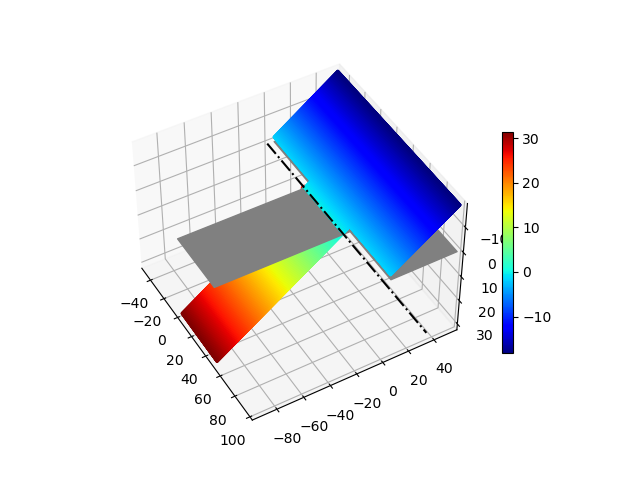

In [5]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(45, -30)
x = points[:, 0]
y = points[:, 1]
z =sigx

mask = sigx < 0
cm = ax.scatter(x[mask], y[mask], z[mask], c=sigx[mask], 
                cmap=plt.cm.jet, vmin=sigx.min(), vmax=sigx.max(), 
                s=.5, zorder=-10, depthshade=0.5)
cm = ax.scatter(x[~mask], y[~mask], z[~mask], c=sigx[~mask], 
                cmap=plt.cm.jet, vmin=sigx.min(), vmax=sigx.max(), 
                s=.5, zorder=10)
fig.colorbar(cm, shrink=.6)
#ax.add_collection3d(Poly3DCollection([verts]), zs=sigx, zdir='x')

x = prurez[:, 0]
y = prurez[:, 1]
verts = list(zip(x,y,np.zeros_like(x)))
ax.add_collection3d(Poly3DCollection([verts], color='grey', zorder=0), zdir='x')

ax.scatter(0,0,0, c='r')
plt.plot([-50, 150],[0, 0],[0, 0],'k-.', zorder=11)

ax.set_xlim(x.min(),x.max())
ax.set_ylim(y.min(),y.max())
ax.set_zlim(z.min(),z.max())

ax.invert_zaxis()